Global Best Position: [2.6 2.8]
Best Fitness Value: 1.9721522630525295e-31
Average Particle Best Fitness Value: 5.640355472330234e-31


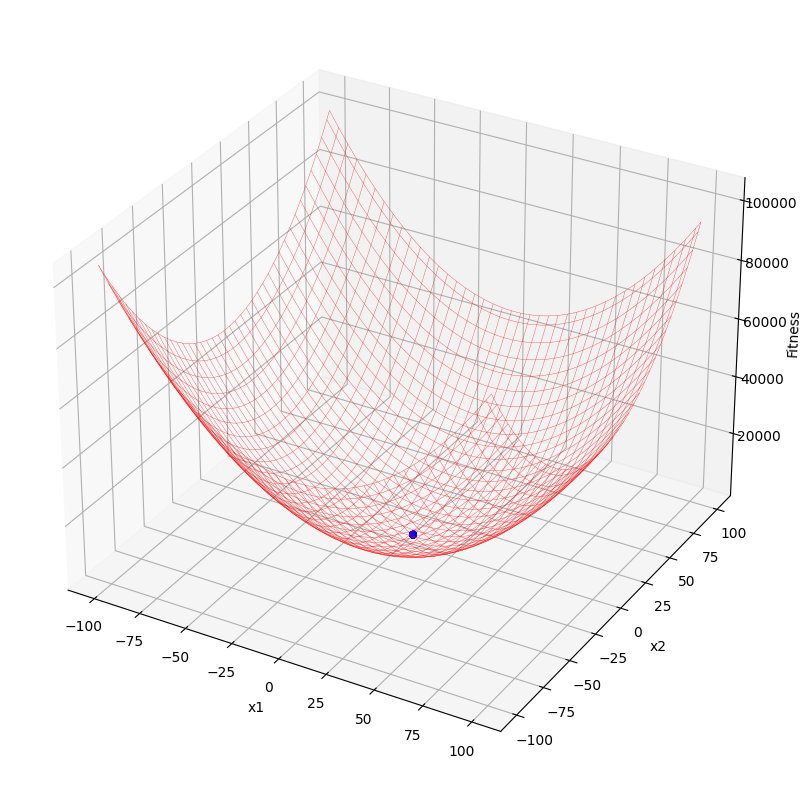

In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# Fitness function
def fitness_function(x1, x2):
    f1 = x1 + 2 * -x2 + 3
    f2 = 2 * x1 + x2 - 8
    z = f1 ** 2 + f2 ** 2
    return z

def update_velocity(particle, velocity, pbest, gbest, w_min=0.5, max=1.0, c=0.1):
    new_velocity = np.zeros_like(particle)
    r1 = random.uniform(0, max)
    r2 = random.uniform(0, max)
    w = random.uniform(w_min, max)
    c1, c2 = c, c
    for i in range(len(particle)):
        new_velocity[i] = (w * velocity[i] +
                           c1 * r1 * (pbest[i] - particle[i]) +
                           c2 * r2 * (gbest[i] - particle[i]))
    return new_velocity

def update_position(particle, velocity):
    return particle + velocity

def pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion):
    particles = np.array([[random.uniform(position_min, position_max) for _ in range(dimension)] for _ in range(population)])
    pbest_position = np.copy(particles)
    pbest_fitness = np.array([fitness_function(p[0], p[1]) for p in particles])

    gbest_index = np.argmin(pbest_fitness)
    gbest_position = pbest_position[gbest_index]
    velocity = np.zeros((population, dimension))

    # Prepare plotting
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Fitness')

    # Create meshgrid for the fitness function surface
    x = np.linspace(position_min, position_max, 80)
    y = np.linspace(position_min, position_max, 80)
    X, Y = np.meshgrid(x, y)
    Z = fitness_function(X, Y)
    ax.plot_wireframe(X, Y, Z, color='r', linewidth=0.2)

    # Placeholder for the scatter plot
    scatter = ax.scatter([], [], [], c='b')

    def update(frame):
        nonlocal gbest_position
        for n in range(population):
            velocity[n] = update_velocity(particles[n], velocity[n], pbest_position[n], gbest_position)
            particles[n] = update_position(particles[n], velocity[n])

        # Calculate new fitness values
        new_fitness = np.array([fitness_function(p[0], p[1]) for p in particles])

        # Update personal best positions and fitness
        for n in range(population):
            if new_fitness[n] < pbest_fitness[n]:
                pbest_fitness[n] = new_fitness[n]
                pbest_position[n] = particles[n]

        # Find global best
        gbest_index = np.argmin(pbest_fitness)
        gbest_position = pbest_position[gbest_index]

        # Update scatter plot data
        scatter._offsets3d = (particles[:, 0], particles[:, 1], new_fitness)

    ani = animation.FuncAnimation(fig, update, frames=generation, interval=100, repeat=False)
    ani.save('./pso_simple.gif', writer='pillow')

    # Print results
    print('Global Best Position:', gbest_position)
    print('Best Fitness Value:', min(pbest_fitness))
    print('Average Particle Best Fitness Value:', np.average(pbest_fitness))

# Parameters
population = 100
dimension = 2
position_min = -100.0
position_max = 100.0
generation = 400
fitness_criterion = 10e-4

# Run PSO
pso_2d(population, dimension, position_min, position_max, generation, fitness_criterion)


In [ ]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML

# Import PySwarms
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.sphere, iters=100)

2024-10-30 05:01:12,691 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=1.29e-8
2024-10-30 05:01:13,457 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.2919056836942412e-08, best pos: [7.03124759e-05 8.93040456e-05]


In [ ]:
# equivalent to rcParams['animation.html'] = 'html5'
# See http://louistiao.me/posts/notebooks/save-matplotlib-animations-as-gifs/
rc('animation', html='html5')

In [ ]:
from pyswarms.utils.plotters.formatters import Mesher

# Initialize mesher with sphere function
m = Mesher(func=fx.sphere)

2024-10-30 05:01:54,785 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2024-10-30 05:01:54,789 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1000x800 -pix_fmt rgba -r 12.5 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmp9yeb_d1b/temp.m4v


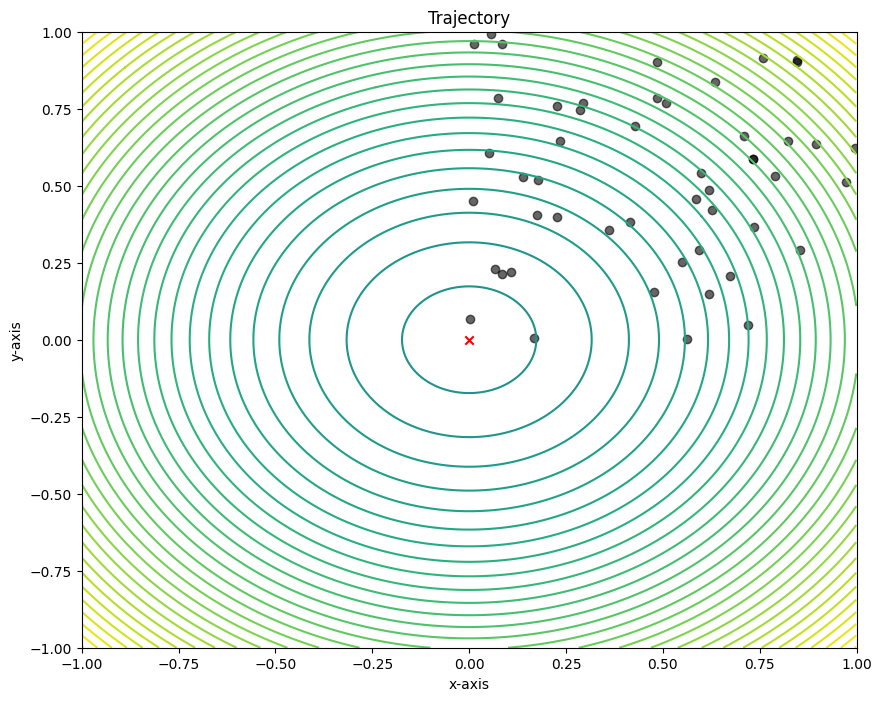

In [ ]:
# Make animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

# Enables us to view it in a Jupyter notebook
HTML(animation.to_html5_video())